(50000, 32, 32, 3) (10000, 32, 32, 3)
Number of labels: 100
array pointer = 60
x_train[60] shape: (32, 32, 3)
label: [36]


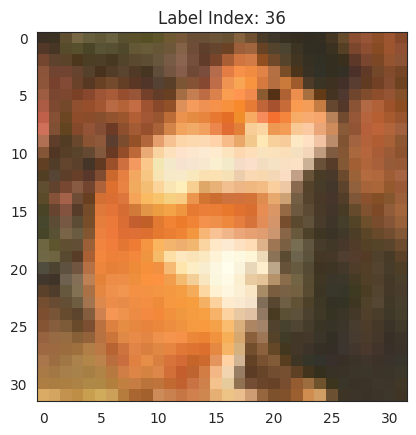

In [3]:
# Import required packages (adapted from lecture notes)
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import os
import tensorflow as tf
from tensorflow.keras.datasets import cifar100
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

# Settings
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
sns.set_style('white')

# Load CIFAR-100 dataset
(X_train, y_train), (X_test, y_test) = cifar100.load_data(label_mode='fine')
print(X_train.shape, X_test.shape)

# Number of unique labels
n_labels = len(np.unique(y_train))
print("Number of labels:", n_labels)

# Workflow: inspect a specific image
pointer = 60
print(f"array pointer = {pointer}")
print(f"x_train[{pointer}] shape: {X_train[pointer].shape}")
print(f"label: {y_train[pointer]}")

plt.imshow(X_train[pointer])
plt.title(f"Label Index: {y_train[pointer][0]}")
plt.show()


In [4]:
# Updated image checker for CIFAR-100
def check_images(dataset, dataset_name):
    invalid_count = 0
    valid_count = 0

    for idx, image in enumerate(dataset):
        if not isinstance(image, np.ndarray):
            print(f"{dataset_name} - Index {idx}: Not a valid image array")
            invalid_count += 1
            continue

        if image.shape != (32, 32, 3):
            print(f"{dataset_name} - Index {idx}: Incorrect shape {image.shape}")
            invalid_count += 1
            continue

        if not (image.dtype == np.uint8 and image.min() >= 0 and image.max() <= 255):
            print(f"{dataset_name} - Index {idx}: Invalid pixel values (Min: {image.min()}, Max: {image.max()})")
            invalid_count += 1
            continue

        if np.isnan(image).any():
            print(f"{dataset_name} - Index {idx}: Contains NaN values")
            invalid_count += 1
            continue

        valid_count += 1

    print(f"\n{dataset_name}: {valid_count} valid images, {invalid_count} invalid images")

# Run checks
print("Checking Images...\n")
check_images(X_train, "Train")
check_images(X_test, "Test")


Checking Images...


Train: 50000 valid images, 0 invalid images

Test: 10000 valid images, 0 invalid images


In [5]:
X_train, X_val, y_train, y_val = train_test_split(
    X_train, y_train, test_size=0.2, random_state=0
)

print("* Train set:", X_train.shape, y_train.shape)
print("* Validation set:", X_val.shape, y_val.shape)
print("* Test set:", X_test.shape, y_test.shape)


* Train set: (40000, 32, 32, 3) (40000, 1)
* Validation set: (10000, 32, 32, 3) (10000, 1)
* Test set: (10000, 32, 32, 3) (10000, 1)


In [6]:
# CIFAR-100 class names
label_names = [
    'apple', 'aquarium_fish', 'baby', 'bear', 'beaver', 'bed', 'bee', 'beetle', 'bicycle', 'bottle',
    'bowl', 'boy', 'bridge', 'bus', 'butterfly', 'camel', 'can', 'castle', 'caterpillar', 'cattle',
    'chair', 'chimpanzee', 'clock', 'cloud', 'cockroach', 'couch', 'crab', 'crocodile', 'cup', 'dinosaur',
    'dolphin', 'elephant', 'flatfish', 'forest', 'fox', 'girl', 'hamster', 'house', 'kangaroo', 'keyboard',
    'lamp', 'lawn_mower', 'leopard', 'lion', 'lizard', 'lobster', 'man', 'maple_tree', 'motorcycle', 'mountain',
    'mouse', 'mushroom', 'oak_tree', 'orange', 'orchid', 'otter', 'palm_tree', 'pear', 'pickup_truck', 'pine_tree',
    'plain', 'plate', 'poppy', 'porcupine', 'possum', 'rabbit', 'raccoon', 'ray', 'road', 'rocket',
    'rose', 'sea', 'seal', 'shark', 'shrew', 'skunk', 'skyscraper', 'snail', 'snake', 'spider',
    'squirrel', 'streetcar', 'sunflower', 'sweet_pepper', 'table', 'tank', 'telephone', 'television', 'tiger', 'tractor',
    'train', 'trout', 'tulip', 'turtle', 'wardrobe', 'whale', 'willow_tree', 'wolf', 'woman', 'worm'
]

# Create label frequency dataframe
df_freq = pd.DataFrame(columns=['Set', 'Label', 'Frequency'])

def count_labels(dataset, dataset_name):
    global df_freq
    unique, counts = np.unique(dataset, return_counts=True)
    for label, frequency in zip(unique, counts):
        df_freq = pd.concat([
            df_freq,
            pd.DataFrame([{
                'Set': dataset_name,
                'Label': label_names[label],
                'Frequency': frequency
            }])
        ], ignore_index=True)
        print(f"* {dataset_name} - {label_names[label]}: {frequency} images")

count_labels(y_train, "Train")
count_labels(y_test, "Test")
count_labels(y_val, "Validation")


* Train - apple: 377 images
* Train - aquarium_fish: 414 images
* Train - baby: 399 images
* Train - bear: 405 images
* Train - beaver: 409 images
* Train - bed: 392 images
* Train - bee: 414 images
* Train - beetle: 409 images
* Train - bicycle: 399 images
* Train - bottle: 391 images
* Train - bowl: 405 images
* Train - boy: 392 images
* Train - bridge: 400 images
* Train - bus: 403 images
* Train - butterfly: 415 images
* Train - camel: 393 images
* Train - can: 394 images
* Train - castle: 399 images
* Train - caterpillar: 394 images
* Train - cattle: 408 images
* Train - chair: 403 images
* Train - chimpanzee: 414 images
* Train - clock: 396 images
* Train - cloud: 391 images
* Train - cockroach: 391 images
* Train - couch: 395 images
* Train - crab: 401 images
* Train - crocodile: 384 images
* Train - cup: 399 images
* Train - dinosaur: 414 images
* Train - dolphin: 407 images
* Train - elephant: 404 images
* Train - flatfish: 402 images
* Train - forest: 404 images
* Train - fox

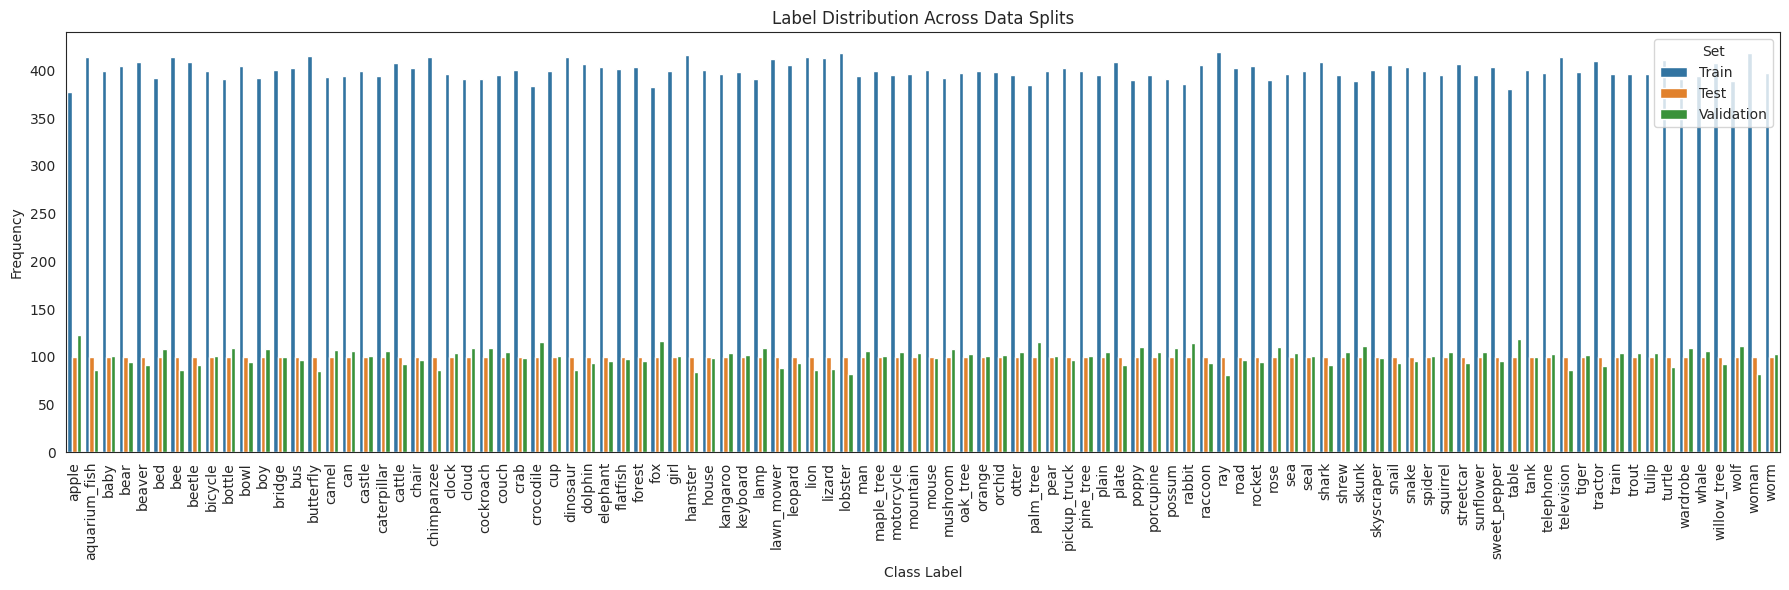

In [7]:
# Visualise label frequency using seaborn
plt.figure(figsize=(18, 6))
sns.barplot(data=df_freq, x='Label', y='Frequency', hue='Set')
plt.xticks(rotation=90)
plt.title('Label Distribution Across Data Splits')
plt.xlabel('Class Label')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()


In [8]:
# Step 3: Define the CNN model structure

model = Sequential()

# Input layer + 1st Conv block
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)))
model.add(MaxPool2D(pool_size=(2, 2)))

# 2nd Conv block
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(MaxPool2D(pool_size=(2, 2)))

# 3rd Conv block
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(MaxPool2D(pool_size=(2, 2)))

# Flattening layer
model.add(Flatten())

# Fully connected (dense) layer
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))  # Dropout to reduce overfitting

# Output layer for 100 classes
model.add(Dense(100, activation='softmax'))


/usr/local/python/3.12.1/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2025-05-21 22:17:21.822526: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


In [9]:
# Compile model using Adam optimizer and categorical crossentropy loss
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',  # we're using sparse labels (not one-hot)
    metrics=['accuracy']
)

# Display model summary
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 8, 8, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │       524,544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 100)            │        25,700 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 643,492 (2.45 MB)

 Trainable params: 643,492 (2.45 MB)

 Non-trainable params: 0 (0.00 B)

In [10]:
# Step 4: Train the model with validation and early stopping

# Early stopping to prevent overfitting
early_stop = EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)

# Fit the model
history = model.fit(
    X_train, y_train,
    epochs=30,
    batch_size=64,
    validation_data=(X_val, y_val),
    callbacks=[early_stop],
    verbose=2
)


Epoch 1/30
625/625 - 29s - 46ms/step - accuracy: 0.0144 - loss: 4.8328 - val_accuracy: 0.0261 - val_loss: 4.4900
Epoch 2/30
625/625 - 37s - 58ms/step - accuracy: 0.0261 - loss: 4.4465 - val_accuracy: 0.0536 - val_loss: 4.2332
Epoch 3/30
625/625 - 23s - 37ms/step - accuracy: 0.0483 - loss: 4.2398 - val_accuracy: 0.0928 - val_loss: 3.9482
Epoch 4/30
625/625 - 42s - 67ms/step - accuracy: 0.0803 - loss: 3.9952 - val_accuracy: 0.1452 - val_loss: 3.6522
Epoch 5/30
625/625 - 24s - 38ms/step - accuracy: 0.1177 - loss: 3.7788 - val_accuracy: 0.1740 - val_loss: 3.5081
Epoch 6/30
625/625 - 40s - 64ms/step - accuracy: 0.1462 - loss: 3.5953 - val_accuracy: 0.2074 - val_loss: 3.3016
Epoch 7/30
625/625 - 24s - 39ms/step - accuracy: 0.1740 - loss: 3.4622 - val_accuracy: 0.2192 - val_loss: 3.2290
Epoch 8/30
625/625 - 24s - 39ms/step - accuracy: 0.1949 - loss: 3.3342 - val_accuracy: 0.2308 - val_loss: 3.1852
Epoch 9/30
625/625 - 40s - 64ms/step - accuracy: 0.2145 - loss: 3.2225 - val_accuracy: 0.2592 - 

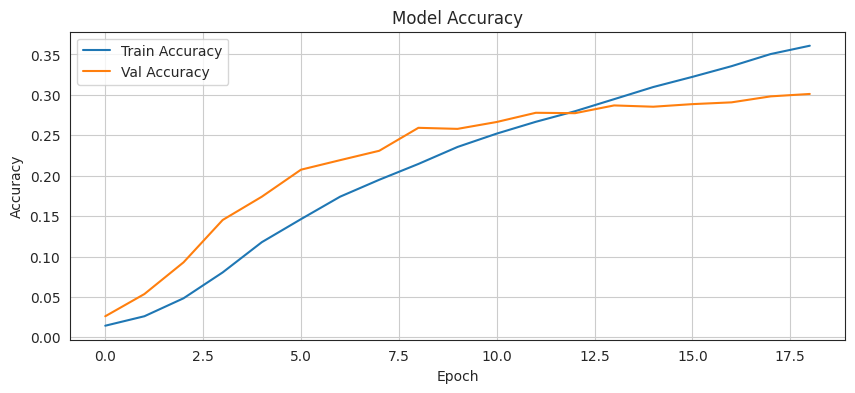

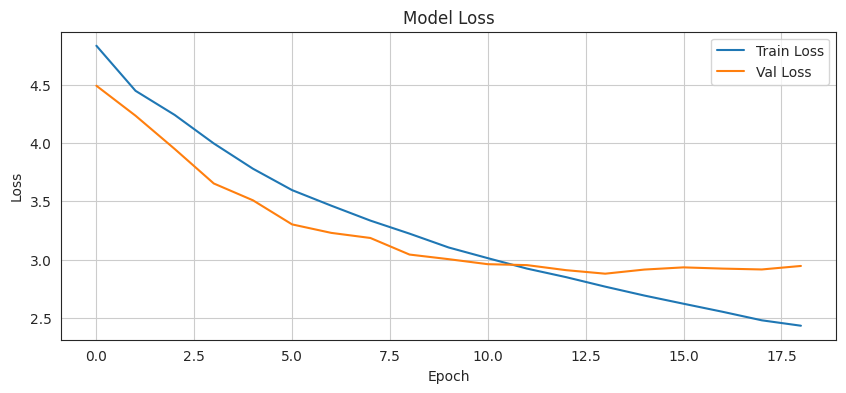

In [11]:
# Plot accuracy
plt.figure(figsize=(10, 4))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# Plot loss
plt.figure(figsize=(10, 4))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()


## building model

In [ ]:
model = models.Sequential()

# First Convolutional Block
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))

# Second Convolutional Block
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

# Third Convolutional Block
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.Flatten())

# Fully Connected Layers
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(100, activation='softmax'))  # 100 Classes

# Compile the Model
model.compile(optimizer='adam', 
               loss='categorical_crossentropy', 
               metrics=['accuracy'])

model.summary()
